In [23]:
import os
import PIL
import numpy as np

def png_to_numpy(images_folder):
  # create 2 empty lists, one for features and one for labels
  features = []
  labels   = []
  for emotion_folder in os.listdir(images_folder):
    # create path for each emotion folder
    emotion_folder_path = os.path.join(images_folder, emotion_folder)
    count = 0
    for filename in os.listdir(emotion_folder_path):
      if filename.endswith('.png') and count < 500:
        # open the image
        image_path = os.path.join(emotion_folder_path, filename)
        img = PIL.Image.open(image_path)
        # Apply image augmentation (rotation)
        rotated_img = img.rotate(np.random.uniform(-10, 10))
        # convert the image into a numpy array
        img_array = np.array(img)
        # flatten the array to size 2304 (48x48)
        img_array_flat = img_array.flatten()
        # append the flattened array to the features list
        features.append(img_array_flat)
        # append the label to the labels list
        labels.append(emotion_folder)
        # increment count
        count = count + 1
    # lastly convert both lists into numpy arrays
    features_np = np.array(features)
    labels_np   = np.array(labels)
  return features_np, labels_np

In [24]:
feature, label = png_to_numpy("./dataset")

In [25]:
for i in range(8):
  print(f"{feature[i*250]} - {label[i*250]}")

[21 13  4 ...  0 28  8] - engaged
[251 250 250 ... 113  72 194] - engaged
[255 254 255 ... 145 149 154] - surprised
[108  74  61 ...  48  66  83] - surprised
[ 47  42  29 ... 160  97  99] - neutral
[95 62 30 ... 23 28 26] - neutral
[55 56 61 ... 81 80 80] - happy
[255 255 255 ...  53 129 148] - happy


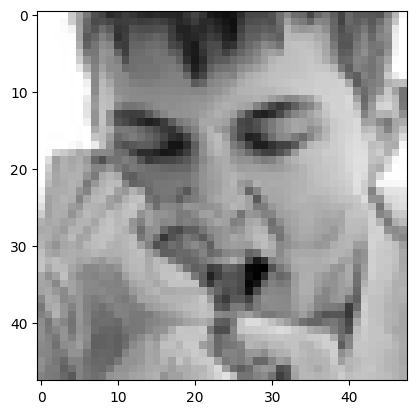

In [32]:
import matplotlib.pyplot as plt
# picking the random index from the dataset
rdn = np.random.randint(0,len(feature))
flattened_imag = feature[rdn]
# reshape the flattened image to 4x48 from its 1D array
reshape_image = flattened_imag.reshape(48,48)
# display the image using matplotlib
plt.imshow(reshape_image, cmap="gray")
plt.show()

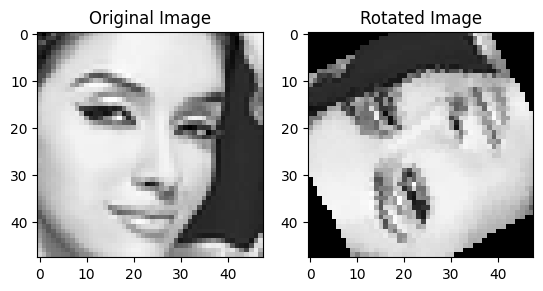

In [122]:
import os
import PIL
import numpy as np
import matplotlib.pyplot as plt

def show_original_and_rotated(images_folder):
    # Pick one image from the dataset
    image_path = os.path.join(images_folder, 'happy', 'im106.png')
    # Open the original image
    original_img = PIL.Image.open(image_path)
    # Display the original image
    plt.subplot(1, 2, 1)
    plt.imshow(original_img, cmap='gray')  # Assuming it's a grayscale image
    plt.title('Original Image')
    # Apply image augmentation (rotation)
    rotated_img = original_img.rotate(np.random.uniform(-120, 120))  # Adjust the rotation range as needed
    # Display the rotated image
    plt.subplot(1, 2, 2)
    plt.imshow(rotated_img, cmap='gray')  # Assuming it's a grayscale image
    plt.title('Rotated Image')
    plt.show()
# Example usage:
images_folder = "./dataset"
show_original_and_rotated(images_folder)

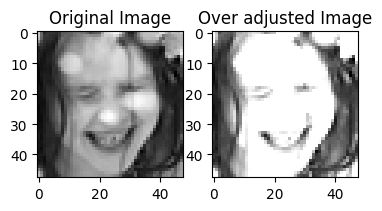

In [47]:
import os
import PIL
import numpy as np
import matplotlib.pyplot as plt
from PIL import ImageEnhance

def show_original_and_adjusted(images_folder):
    # Pick one image from the dataset
    image_path = os.path.join(images_folder, 'happy', 'im10.png')
    # Open the original image
    original_img = PIL.Image.open(image_path)
    # Display the original image
    plt.subplot(1, 3, 1)
    plt.imshow(original_img, cmap='gray')  # Assuming it's a grayscale image
    plt.title('Original Image')
    # Apply brightness adjustment
    enhancer = ImageEnhance.Brightness(original_img)
    factor = np.random.uniform(0.5, 2.5)  # Adjust the brightness factor as needed
    adjusted_img = enhancer.enhance(factor)
    # Display the adjusted image
    plt.subplot(1, 3, 2)
    plt.imshow(adjusted_img, cmap='gray')  # Assuming it's a grayscale image
    plt.title('Over adjusted Image')
    plt.show()
# Example usage:
images_folder = "./dataset"
show_original_and_adjusted(images_folder)
